In [103]:
import os
import re
import csv


In [104]:
cwd = os.getcwd()

# preapre CSV

In [105]:
results_path = "/Users/u7826985/Projects/Nvidia/results/100taxa_dataset"
results_path_aa = f"{results_path}_AA"
# results_path = results_path_aa

output_csv = "results.csv"

In [106]:
# Regex to capture the RESULT line
pattern = re.compile(
    r"\[RESULT\]\s*backend=(\w+)\s+taxa=(\d+)\s+sites=(\d+)\s+patterns=(\d+)\s+time=([\d\.e\+\-]+)s\s+likelihood=([\-.\deE]+)"
)


In [107]:
lengths = [100, 1000, 10000, 100000, 1000000]

In [108]:
data = []

In [109]:
#read files in results_path


def read_files_in_directory(directory):
    print(f"Reading files in directory: {directory}")
    files = os.listdir(directory)
    for file in files:
        if file.endswith('.txt'):
            print(f"Reading file: {file}")
            with open(f'{directory}/{file}', 'r') as f:
                for line in f:
                    match = pattern.search(line)
                    if match:
                        
                        backend, taxa, sites, patterns, time, likelihood = match.groups()
                        if taxa != "100":
                            continue
                        backend += "_GPU"
                        data.append([backend, taxa, sites, patterns, likelihood, time])

                        # Write to CSV
                        # with open(output_csv, 'w', newline='') as csvfile:
                        #     writer = csv.writer(csvfile)
                        #     writer.writerow(["backend", "taxa", "sites", "patterns", "likelihood", "time"])
                        #     writer.writerows(data)

    print(f"Extracted {len(data)} results to {output_csv}")



In [110]:
for length in lengths:
    read_files_in_directory(f"{results_path}/alignment_{length}/")

Reading files in directory: /Users/u7826985/Projects/Nvidia/results/100taxa_dataset/alignment_100/
Reading file: output_preliminary_results_run1_alignment_100_100_dna_openacc_v100.txt
Reading file: output_preliminary_results_run1_alignment_100_100_aa_openacc_v100.txt
Extracted 1 results to results.csv
Reading files in directory: /Users/u7826985/Projects/Nvidia/results/100taxa_dataset/alignment_1000/
Reading file: output_preliminary_results_run1_alignment_1000_1000_aa_openacc_v100.txt
Extracted 2 results to results.csv
Reading files in directory: /Users/u7826985/Projects/Nvidia/results/100taxa_dataset/alignment_10000/
Reading file: output_preliminary_results_run1_alignment_10000_10000_aa_openacc_v100.txt
Extracted 3 results to results.csv
Reading files in directory: /Users/u7826985/Projects/Nvidia/results/100taxa_dataset/alignment_100000/
Reading file: output_preliminary_results_run1_alignment_100000_100000_aa_openacc_v100.txt
Extracted 4 results to results.csv
Reading files in director

In [111]:
print(data)

[['OPENACC_GPU', '100', '100', '100', '-9916.299361683584721', '0.324772182000000'], ['OPENACC_GPU', '100', '1000', '1000', '-96759.044062635482987', '0.268911017000000'], ['OPENACC_GPU', '100', '10000', '10000', '-1012046.952337684342638', '0.274963025000000'], ['OPENACC_GPU', '100', '100000', '100000', '-9880658.263623952865601', '0.366365983000000'], ['OPENACC_GPU', '100', '1000000', '1000000', '-95674346.630611360073090', '1.299459842000000']]


In [112]:
alignment_pattern = re.compile(r"Alignment has (\d+) sequences with (\d+) columns, (\d+) distinct patterns")
likelihood_pattern = re.compile(r"Initial log-likelihood:\s+([-0-9.]+).*?took ([0-9.]+) wall-clock sec")

# Data list
# data = []


In [113]:
# add iqtree results
iqtree_results_path = "results/iqtree_results"

def read_iqtree_results(directory):
    files = os.listdir(directory)
    for file in files:
        if file.endswith('.log'):
            print(f"Reading IQ-TREE file: {file}")
            with open(f'{directory}/{file}', 'r') as f:
                content = f.read()
        
                # Extract alignment info
                aln_match = alignment_pattern.search(content)
                ll_match = likelihood_pattern.search(content)
                
                if aln_match and ll_match:
                    taxa = int(aln_match.group(1))
                    sites = int(aln_match.group(2))
                    patterns = int(aln_match.group(3))
                    likelihood = float(ll_match.group(1))
                    time = float(ll_match.group(2))
                    
                    data.append(["IQ-TREE_CPU", taxa, sites, patterns, likelihood, time])



    print(f"Extracted {len(data)} IQ-TREE results to {output_csv}")

In [114]:
for length in lengths:  
    read_iqtree_results(f"{results_path}/alignment_{length}/")

Reading IQ-TREE file: tree.full.treefile.log
Reading IQ-TREE file: output_preliminary_results_run1_alignment_100_100_iqtree.log
Extracted 6 IQ-TREE results to results.csv
Reading IQ-TREE file: output_preliminary_results_run1_alignment_1000_1000_iqtree.log
Reading IQ-TREE file: tree.full.treefile.log
Extracted 7 IQ-TREE results to results.csv
Reading IQ-TREE file: output_preliminary_results_run1_alignment_10000_10000_iqtree.log
Reading IQ-TREE file: tree.full.treefile.log
Extracted 8 IQ-TREE results to results.csv
Reading IQ-TREE file: tree.full.treefile.log
Reading IQ-TREE file: output_preliminary_results_run1_alignment_100000_100000_iqtree.log
Extracted 9 IQ-TREE results to results.csv
Reading IQ-TREE file: tree.full.treefile.log
Reading IQ-TREE file: output_preliminary_results_run1_alignment_1000000_1000000_iqtree.log
Extracted 10 IQ-TREE results to results.csv


In [115]:
print(data)

[['OPENACC_GPU', '100', '100', '100', '-9916.299361683584721', '0.324772182000000'], ['OPENACC_GPU', '100', '1000', '1000', '-96759.044062635482987', '0.268911017000000'], ['OPENACC_GPU', '100', '10000', '10000', '-1012046.952337684342638', '0.274963025000000'], ['OPENACC_GPU', '100', '100000', '100000', '-9880658.263623952865601', '0.366365983000000'], ['OPENACC_GPU', '100', '1000000', '1000000', '-95674346.630611360073090', '1.299459842000000'], ['IQ-TREE_CPU', 100, 100, 100, -6721.794, 0.001], ['IQ-TREE_CPU', 100, 1000, 1000, -65389.763, 0.002], ['IQ-TREE_CPU', 100, 10000, 10000, -683428.202, 0.02], ['IQ-TREE_CPU', 100, 100000, 100000, -6622230.822, 0.197], ['IQ-TREE_CPU', 100, 1000000, 1000000, -64844571.582, 1.922]]


In [116]:
# Write to CSV
with open(output_csv, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["backend", "taxa", "sites", "patterns", "likelihood", "time"])
    writer.writerows(data)

# Analysis of Results

In [117]:
import pandas as pd
import matplotlib.pyplot as plt


In [118]:
# Read the CSV file into a DataFrame
df = pd.read_csv(output_csv)
# Display the first few rows of the DataFrame
df.head()

,backend,taxa,sites,patterns,likelihood,time
0,OPENACC_GPU,100,100,100,-9.916299e+03,0.324772
1,OPENACC_GPU,100,1000,1000,-9.675904e+04,0.268911
2,OPENACC_GPU,100,10000,10000,-1.012047e+06,0.274963
3,OPENACC_GPU,100,100000,100000,-9.880658e+06,0.366366
4,OPENACC_GPU,100,1000000,1000000,-9.567435e+07,1.299460


In [119]:
groups = df.groupby('taxa')

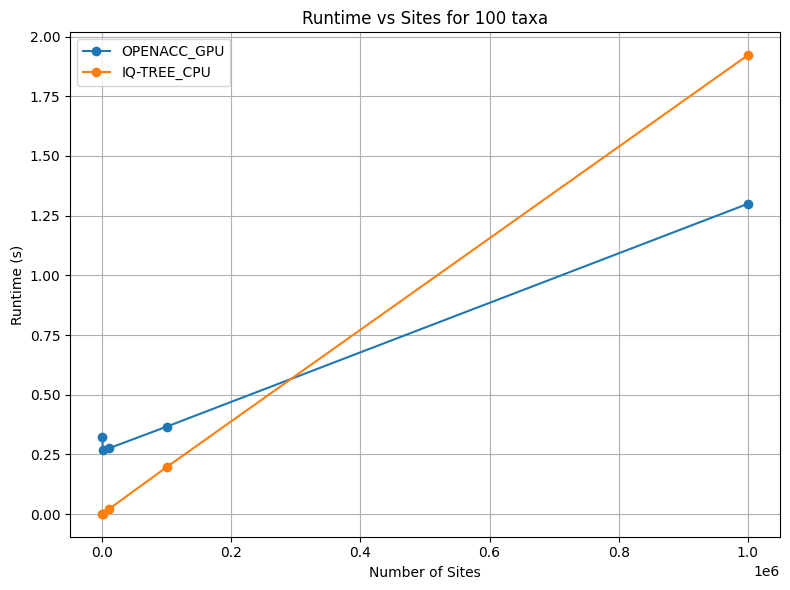

In [120]:
# Plot
plt.figure(figsize=(8,6))
for taxa, group in groups:
    if taxa != 100:
        continue
        
    for backend in group['backend'].unique():
        backend_data = group[group['backend'] == backend]
        plt.plot(
            backend_data['sites'],
            backend_data['time'],
            marker='o',
            label=f"{backend}"
        )

plt.xlabel('Number of Sites')
plt.ylabel('Runtime (s)')
plt.title('Runtime vs Sites for 100 taxa')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


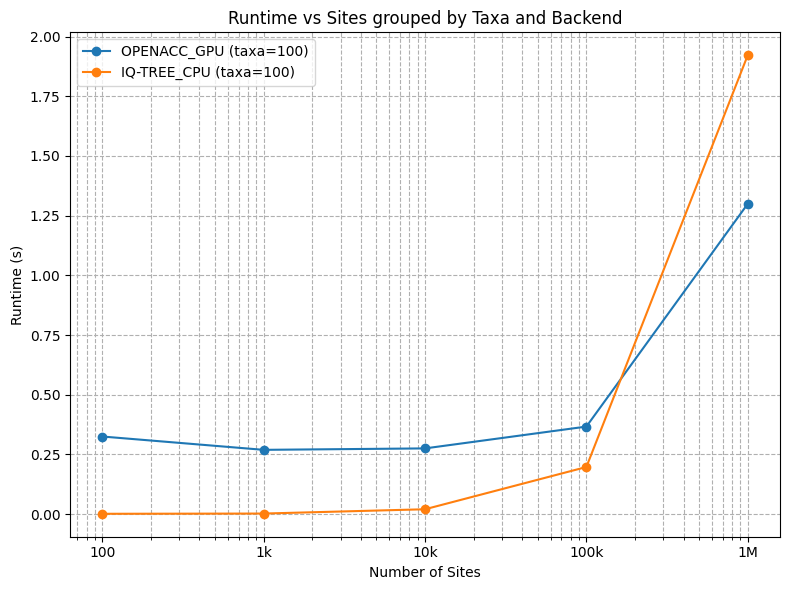

In [121]:
# Plot
plt.figure(figsize=(8,6))
for taxa, group in groups:
    if taxa != 100:
        continue
    for backend in group['backend'].unique():
        backend_data = group[group['backend'] == backend]
        plt.plot(
            backend_data['sites'],
            backend_data['time'],
            marker='o',
            label=f"{backend} (taxa={taxa})"
        )

plt.xlabel('Number of Sites')
plt.ylabel('Runtime (s)')
plt.title('Runtime vs Sites grouped by Taxa and Backend')
plt.legend()
plt.grid(True, which="both", ls="--")

# Use log scale for x-axis
plt.xscale('log')

# Set custom ticks for log scale
plt.xticks([100, 1000, 10000, 100000, 1000000], 
           ['100', '1k', '10k', '100k', '1M'])

plt.tight_layout()
plt.show()

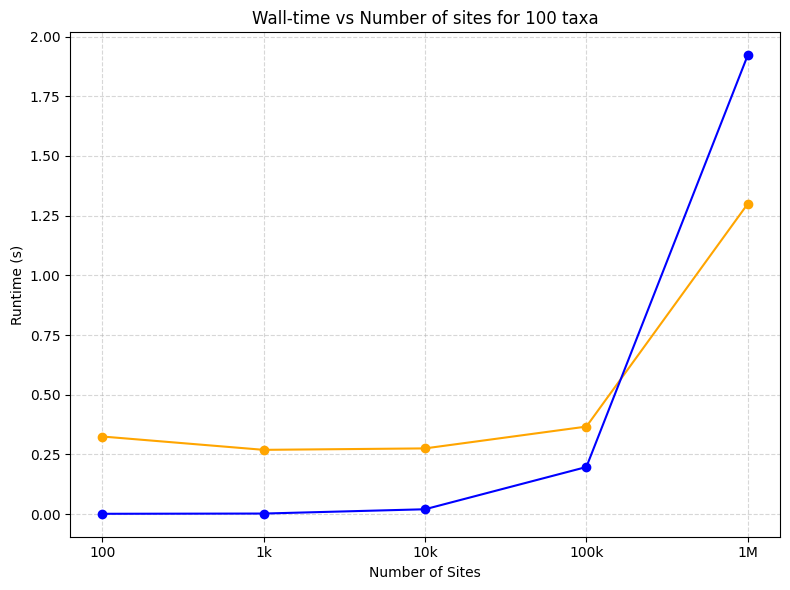

In [122]:
groups = df.groupby('taxa')

plt.figure(figsize=(8,6))
for taxa, group in groups:
    if taxa != 100:
        continue  # Skip taxa other than 100
        
    for backend in group['backend'].unique():
        # chnage the colors for better visibility
        if backend == 'IQ-TREE_CPU':
            color = 'blue'
        elif backend == 'OPENACC_GPU':
            color = 'orange'
            
        backend_data = group[group['backend'] == backend].sort_values('sites')  # ✅ Sort by sites
        if backend in [ 'IQ-TREE_SIMD_withoutbrent', 'EIGEN']:
            continue
        plt.plot(
            backend_data['sites'],
            backend_data['time'],
            marker='o',
            label=f"{backend}",
            color=color
        )

plt.xlabel('Number of Sites')
plt.ylabel('Runtime (s)')
plt.title('Wall-time vs Number of sites for 100 taxa')
# plt.legend()

# Use log scale for x-axis
plt.xscale('log')
plt.xticks([100, 1000, 10000, 100000, 1000000], 
           ['100', '1k', '10k', '100k', '1M'])
plt.minorticks_off()
plt.grid(True, which="major", ls="--", alpha=0.5)

plt.tight_layout()
plt.savefig(f'{cwd}/runtime_vs_sites_100taxa.png', dpi=300)



plt.show()
# save figure 300 dpi

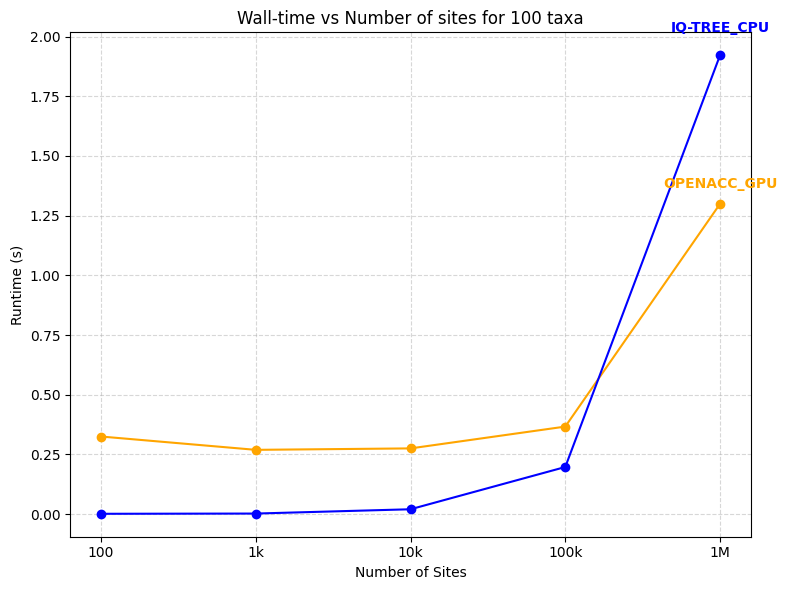

In [123]:
plt.figure(figsize=(8,6))
for taxa, group in groups:
    if taxa != 100:
        continue  # Skip taxa other than 100
        
    for backend in group['backend'].unique():
        if backend in ['IQ-TREE_SIMD_withoutbrent', 'EIGEN']:
            continue

        # Assign color
        if backend == 'IQ-TREE_CPU':
            color = 'blue'
        elif backend == 'OPENACC_GPU':
            color = 'orange'
        else:
            color = 'gray'

        backend_data = group[group['backend'] == backend].sort_values('sites')

        # Plot line
        plt.plot(
            backend_data['sites'],
            backend_data['time'],
            marker='o',
            color=color
        )

        # Add label text slightly above the last data point
        last_x = backend_data['sites'].iloc[-1]
        last_y = backend_data['time'].iloc[-1]
        plt.text(
            last_x, last_y * 1.05,  # shift upward by 5%
            backend,
            color=color,
            fontsize=10,
            fontweight='bold',
            ha='center'
        )

plt.xlabel('Number of Sites')
plt.ylabel('Runtime (s)')
plt.title('Wall-time vs Number of sites for 100 taxa')

plt.xscale('log')
plt.xticks([100, 1000, 10000, 100000, 1000000], 
           ['100', '1k', '10k', '100k', '1M'])
plt.minorticks_off()
plt.grid(True, which="major", ls="--", alpha=0.5)

plt.tight_layout()
plt.savefig(f'{cwd}/runtime_vs_sites_100taxa.png', dpi=300)
plt.show()


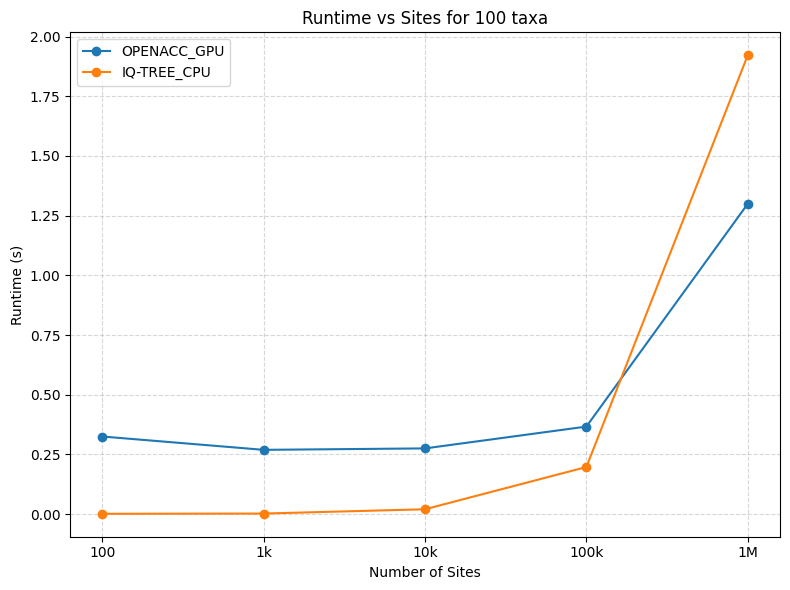

In [79]:
#only GPU 
plt.figure(figsize=(8,6))
for taxa, group in groups:
    if taxa != 100:
        continue  # Skip taxa other than 100
    for backend in group['backend'].unique():
        backend_data = group[group['backend'] == backend].sort_values('sites')  # ✅ Sort by sites
        if backend in ['IQ-TREE_SIMD', 'CPU', 'EIGEN']:
            continue
        plt.plot(
            backend_data['sites'],
            backend_data['time'],
            marker='o',
            label=f"{backend}"
        )

plt.xlabel('Number of Sites')
plt.ylabel('Runtime (s)')
plt.title('Runtime vs Sites for 100 taxa')
plt.legend()

# Use log scale for x-axis
plt.xscale('log')
plt.xticks([100, 1000, 10000, 100000, 1000000], 
           ['100', '1k', '10k', '100k', '1M'])
plt.minorticks_off()
plt.grid(True, which="major", ls="--", alpha=0.5)

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


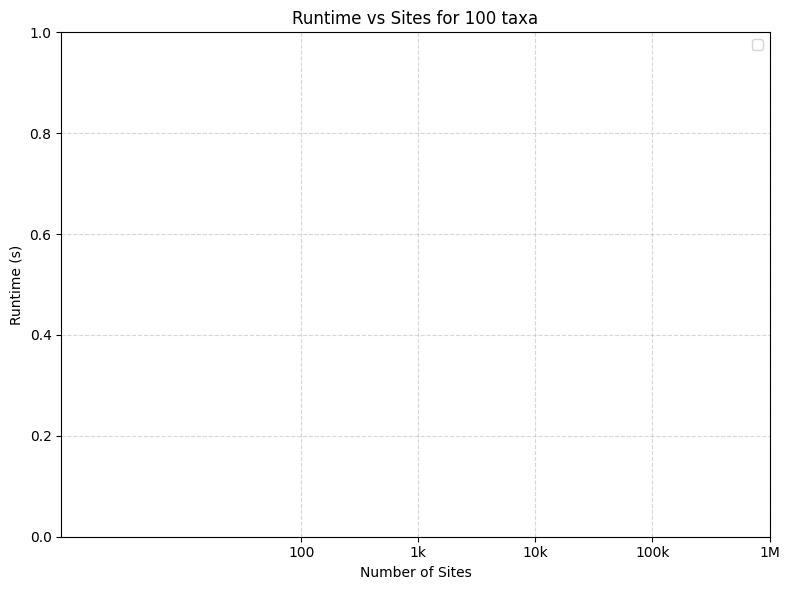

In [80]:
#only GPU 
plt.figure(figsize=(8,6))
for taxa, group in groups:
    if taxa != 100:
        continue  # Skip taxa other than 100
    for backend in group['backend'].unique():
        backend_data = group[group['backend'] == backend].sort_values('sites')  # ✅ Sort by sites
        if backend not in ['IQ-TREE_SIMD', 'IQ-TREE_SIMD_withoutbrent']:
            continue
        plt.plot(
            backend_data['sites'],
            backend_data['time'],
            marker='o',
            label=f"{backend}"
        )

plt.xlabel('Number of Sites')
plt.ylabel('Runtime (s)')
plt.title('Runtime vs Sites for 100 taxa')
plt.legend()

# Use log scale for x-axis
plt.xscale('log')
plt.xticks([100, 1000, 10000, 100000, 1000000], 
           ['100', '1k', '10k', '100k', '1M'])
plt.minorticks_off()
plt.grid(True, which="major", ls="--", alpha=0.5)

plt.tight_layout()
plt.show()